Fieldtrip: KIT Attention Task Analysis
======================================

Lead authors: Hadi Zaatiti <hadi.zaatiti@nyu.edu>, Karima Raafat <karima.raafat@nyu.edu>

The `Attention Task` code experiment in `PsychToolBox` can be found here:

[Attention Task](https://meg-pipeline.readthedocs.io/en/latest/3-experimentdesign/experiments/7-attention-experiment.html)

Importing data 
--------------

The data used in this notebook is hosted on `NYU BOX`. Permissions are given upon request.

- Install the BOX app from [here](https://www.box.com/resources/downloads)
- Set an environment variable with name `MEG_DATA` to the path of the Data folder e.g.,
    - `C:\Users\user_name\Box\MEG\Data`
    - or `C:\Users\user_name\Box\Data

MATLAB setup
------------

Make sure that:
- Fieldtrip is installed in MATLAB
- Add to MATLAB path the custom-made functions for NYUAD MEG lab found [here](https://github.com/Hzaatiti/meg-pipeline/tree/main/pipeline/field_trip_pipelines/matlab_functions)


Each experiment run using the KIT system generates a `.con` file and two or more .mrk files.

In [2]:
%% Attention task pipeline for external noise reduced data

MEG_DATA_FOLDER = getenv('MEG_DATA');

% Set path to KIT .con file of sub-03
DATASET_PATH = [MEG_DATA_FOLDER,'attention-task\'];

%THis needs fixing to sav eproperly
SAVE_PATH = [MEG_DATA_FOLDER, 'attention-task\'];

SUB_ID = 'sub-01\';

ATTEND_RIGHT_CON = [DATASET_PATH, SUB_ID, 'attention_attend_right_01.con'];

ATTEND_LEFT_CON = [DATASET_PATH, SUB_ID, 'attention_attend_left_01.con'];



% Pipeline Configuration


APPLY_FILTERS = false;

The `Attention Task` experiment was coded with the following trigger channels

Trigger information: KIT channel indexing starts with 0 while MATLAB
indexing starts with 1, so ch224 on KIT is ch225 in MATLAB

There is four trial types coded on KIT trigger channels (in KIT indexing):

- Attend left and target appearing right triggered on channel 224
- Attend left and target appearing left triggered on channel 225 
- Attend right and target appearing right triggered on channel 226
- Attend right and target appearing left triggered on channel 227

We can now perform the preprocessing of the data. Two `.con` files have been acquired, the first one is when the participant was attending the right side and a second one when attention was drawn to the left side.

In [3]:
    % Preprocess the MEG data
    cfg = [];
    cfg.dataset = ATTEND_RIGHT_CON;
    cfg.coilaccuracy = 0;
    data_MEG_RIGHT = ft_preprocessing(cfg);

    % Preprocess the MEG data
    cfg = [];
    cfg.dataset = ATTEND_LEFT_CON;
    cfg.coilaccuracy = 0;
    data_MEG_LEFT = ft_preprocessing(cfg);

-------------------------------------------------------------------------------------------
FieldTrip is developed by members and collaborators of the Donders Institute for Brain,
Cognition and Behaviour at Radboud University, Nijmegen, the Netherlands.

                          --------------------------
                        /                            \
                     ------------------------------------
                    /                                    \
          -------------------------------------------------
         /                            /\/\/\/\/\ 
         ---------------------------------------------------
                  |        F  i  e  l  d  T  r  i  p       |
                  ------------------------------------------
                   \                                      /
                     ------------------------------------
                          \            /
                            ----------

Please cite the FieldTrip re

Optional filtering

In [5]:
    %% Filtering data
    
    if APPLY_FILTERS

        % Notch filter the data at 50 Hz
        cfg = [];
        cfg.bsfilter = 'yes';
        cfg.bsfreq = [49 51]; % Notch filter range
        data_MEG_RIGHT = ft_preprocessing(cfg, data_MEG_RIGHT);
    
        % Band-pass filter the data
        cfg = [];
        cfg.bpfilter = 'yes';
        cfg.bpfreq = [4 40]; % Band-pass filter range
        cfg.bpfiltord = 4;    % Filter order
        data_MEG_RIGHT = ft_preprocessing(cfg, data_MEG_RIGHT);
    
    
        % Notch filter the data at 50 Hz
        cfg = [];
        cfg.bsfilter = 'yes';
        cfg.bsfreq = [49 51]; % Notch filter range
        data_MEG_LEFT = ft_preprocessing(cfg, data_MEG_LEFT);
    
        % Band-pass filter the data
        cfg = [];
        cfg.bpfilter = 'yes';
        cfg.bpfreq = [4 40]; % Band-pass filter range
        cfg.bpfiltord = 4;    % Filter order
        data_MEG_LEFT = ft_preprocessing(cfg, data_MEG_LEFT);

    end

We are now ready to define trials for the `Attend Left` block

In [6]:
    %% Define trials and segment the data: Attend Left Target Right

    previewTrigger = data_MEG_LEFT.trial{1}(225, :);

    threshold = (max(previewTrigger) + min(previewTrigger)) / 2;

    cfg = [];
    cfg.dataset  = ATTEND_LEFT_CON;
    cfg.trialdef.eventvalue = 1; % placeholder for the conditions
    cfg.trialdef.prestim    = 0.5; % 1s before stimulus onset
    cfg.trialdef.poststim   = 1.2; % 1s after stimulus onset
    cfg.trialfun = 'ft_trialfun_general';
    cfg.trialdef.chanindx = 225;
    cfg.trialdef.threshold = threshold;
    cfg.trialdef.eventtype = 'combined_binary_trigger'; % this will be the type of the event if combinebinary = true
    cfg.trialdef.combinebinary = 1;
    cfg.preproc.baselinewindow = [-0.2 0];
    cfg.preproc.demean     = 'yes';

    TRIALS_AL_TR = ft_definetrial(cfg);
    
    SG_AL_TR = ft_preprocessing(TRIALS_AL_TR);

evaluating trial function 'ft_trialfun_general'
reading the header from 'C:\Users\hz3752\Box\MEG\Data\attention-task\sub-01\attention_attend_left_01.con'
reading the events from 'C:\Users\hz3752\Box\MEG\Data\attention-task\sub-01\attention_attend_left_01.con'
found 231 events
created 231 trials
the call to "ft_definetrial" took 28 seconds
processing channel { 'AG001' 'AG002' 'AG003' 'AG004' 'AG005' 'AG006' 'AG007' 'AG008' 'AG009' 'AG010' 'AG011' 'AG012' 'AG013' 'AG014' 'AG015' 'AG016' 'AG017' 'AG018' 'AG019' 'AG020' 'AG021' 'AG022' 'AG023' 'AG024' 'AG025' 'AG026' 'AG027' 'AG028' 'AG029' 'AG030' 'AG031' 'AG032' 'AG033' 'AG034' 'AG035' 'AG036' 'AG037' 'AG038' 'AG039' 'AG040' 'AG041' 'AG042' 'AG043' 'AG044' 'AG045' 'AG046' 'AG047' 'AG048' 'AG049' 'AG050' 'AG051' 'AG052' 'AG053' 'AG054' 'AG055' 'AG056' 'AG057' 'AG058' 'AG059' 'AG060' 'AG061' 'AG062' 'AG063' 'AG064' 'AG065' 'AG066' 'AG067' 'AG068' 'AG069' 'AG070' 'AG071' 'AG072' 'AG073' 'AG074' 'AG075' 'AG076' 'AG077' 'AG078' 'AG079' 'AG080

In [7]:
    %% Define trials and segment the data: Attend Left Target Left

    previewTrigger = data_MEG_LEFT.trial{1}(226, :);

    threshold = (max(previewTrigger) + min(previewTrigger)) / 2;

    cfg = [];
    cfg.dataset  = ATTEND_LEFT_CON;
    cfg.trialdef.eventvalue = 1; % placeholder for the conditions
    cfg.trialdef.prestim    = 0.5; % 1s before stimulus onset
    cfg.trialdef.poststim   = 1.2; % 1s after stimulus onset
    cfg.trialfun = 'ft_trialfun_general';
    cfg.trialdef.chanindx = 226;
    cfg.trialdef.threshold = threshold;
    cfg.trialdef.eventtype = 'combined_binary_trigger'; % this will be the type of the event if combinebinary = true
    cfg.trialdef.combinebinary = 1;
    cfg.preproc.baselinewindow = [-0.2 0];
    cfg.preproc.demean     = 'yes';

    TRIALS_AL_TL = ft_definetrial(cfg);
    
    SG_AL_TL = ft_preprocessing(TRIALS_AL_TL);

evaluating trial function 'ft_trialfun_general'
reading the header from 'C:\Users\hz3752\Box\MEG\Data\attention-task\sub-01\attention_attend_left_01.con'
reading the events from 'C:\Users\hz3752\Box\MEG\Data\attention-task\sub-01\attention_attend_left_01.con'
found 232 events
created 232 trials
the call to "ft_definetrial" took 13 seconds
processing channel { 'AG001' 'AG002' 'AG003' 'AG004' 'AG005' 'AG006' 'AG007' 'AG008' 'AG009' 'AG010' 'AG011' 'AG012' 'AG013' 'AG014' 'AG015' 'AG016' 'AG017' 'AG018' 'AG019' 'AG020' 'AG021' 'AG022' 'AG023' 'AG024' 'AG025' 'AG026' 'AG027' 'AG028' 'AG029' 'AG030' 'AG031' 'AG032' 'AG033' 'AG034' 'AG035' 'AG036' 'AG037' 'AG038' 'AG039' 'AG040' 'AG041' 'AG042' 'AG043' 'AG044' 'AG045' 'AG046' 'AG047' 'AG048' 'AG049' 'AG050' 'AG051' 'AG052' 'AG053' 'AG054' 'AG055' 'AG056' 'AG057' 'AG058' 'AG059' 'AG060' 'AG061' 'AG062' 'AG063' 'AG064' 'AG065' 'AG066' 'AG067' 'AG068' 'AG069' 'AG070' 'AG071' 'AG072' 'AG073' 'AG074' 'AG075' 'AG076' 'AG077' 'AG078' 'AG079' 'AG080

Same for the `Attend Right` block.

In [8]:
    %% Define trials and segment the data: Attend Right Target Right

    previewTrigger = data_MEG_RIGHT.trial{1}(227, :);

    threshold = (max(previewTrigger) + min(previewTrigger)) / 2;

    cfg = [];
    cfg.dataset  = ATTEND_RIGHT_CON;
    cfg.trialdef.eventvalue = 1; % placeholder for the conditions
    cfg.trialdef.prestim    = 0.5; % 1s before stimulus onset
    cfg.trialdef.poststim   = 1.2; % 1s after stimulus onset
    cfg.trialfun = 'ft_trialfun_general';
    cfg.trialdef.chanindx = 227;
    cfg.trialdef.threshold = threshold;
    cfg.trialdef.eventtype = 'combined_binary_trigger'; % this will be the type of the event if combinebinary = true
    cfg.trialdef.combinebinary = 1;
    cfg.preproc.baselinewindow = [-0.2 0];
    cfg.preproc.demean     = 'yes';

    TRIALS_AR_TR = ft_definetrial(cfg);
    
    SG_AR_TR = ft_preprocessing(TRIALS_AR_TR);

evaluating trial function 'ft_trialfun_general'
reading the header from 'C:\Users\hz3752\Box\MEG\Data\attention-task\sub-01\attention_attend_right_01.con'
reading the events from 'C:\Users\hz3752\Box\MEG\Data\attention-task\sub-01\attention_attend_right_01.con'
found 231 events
created 231 trials
the call to "ft_definetrial" took 42 seconds
processing channel { 'AG001' 'AG002' 'AG003' 'AG004' 'AG005' 'AG006' 'AG007' 'AG008' 'AG009' 'AG010' 'AG011' 'AG012' 'AG013' 'AG014' 'AG015' 'AG016' 'AG017' 'AG018' 'AG019' 'AG020' 'AG021' 'AG022' 'AG023' 'AG024' 'AG025' 'AG026' 'AG027' 'AG028' 'AG029' 'AG030' 'AG031' 'AG032' 'AG033' 'AG034' 'AG035' 'AG036' 'AG037' 'AG038' 'AG039' 'AG040' 'AG041' 'AG042' 'AG043' 'AG044' 'AG045' 'AG046' 'AG047' 'AG048' 'AG049' 'AG050' 'AG051' 'AG052' 'AG053' 'AG054' 'AG055' 'AG056' 'AG057' 'AG058' 'AG059' 'AG060' 'AG061' 'AG062' 'AG063' 'AG064' 'AG065' 'AG066' 'AG067' 'AG068' 'AG069' 'AG070' 'AG071' 'AG072' 'AG073' 'AG074' 'AG075' 'AG076' 'AG077' 'AG078' 'AG079' 'AG0

In [9]:
    %% Define trials and segment the data: Attend Right Target Left

    previewTrigger = data_MEG_RIGHT.trial{1}(228, :);

    threshold = (max(previewTrigger) + min(previewTrigger)) / 2;

    cfg = [];
    cfg.dataset  = ATTEND_RIGHT_CON;
    cfg.trialdef.eventvalue = 1; % placeholder for the conditions
    cfg.trialdef.prestim    = 0.5; % 1s before stimulus onset
    cfg.trialdef.poststim   = 1.2; % 1s after stimulus onset
    cfg.trialfun = 'ft_trialfun_general';
    cfg.trialdef.chanindx = 228;
    cfg.trialdef.threshold = threshold;
    cfg.trialdef.eventtype = 'combined_binary_trigger'; % this will be the type of the event if combinebinary = true
    cfg.trialdef.combinebinary = 1;
    cfg.preproc.baselinewindow = [-0.2 0];
    cfg.preproc.demean     = 'yes';

    TRIALS_AR_TL = ft_definetrial(cfg);
    
    SG_AR_TL = ft_preprocessing(TRIALS_AR_TL);

evaluating trial function 'ft_trialfun_general'
reading the header from 'C:\Users\hz3752\Box\MEG\Data\attention-task\sub-01\attention_attend_right_01.con'
reading the events from 'C:\Users\hz3752\Box\MEG\Data\attention-task\sub-01\attention_attend_right_01.con'
found 231 events
created 231 trials
the call to "ft_definetrial" took 41 seconds
processing channel { 'AG001' 'AG002' 'AG003' 'AG004' 'AG005' 'AG006' 'AG007' 'AG008' 'AG009' 'AG010' 'AG011' 'AG012' 'AG013' 'AG014' 'AG015' 'AG016' 'AG017' 'AG018' 'AG019' 'AG020' 'AG021' 'AG022' 'AG023' 'AG024' 'AG025' 'AG026' 'AG027' 'AG028' 'AG029' 'AG030' 'AG031' 'AG032' 'AG033' 'AG034' 'AG035' 'AG036' 'AG037' 'AG038' 'AG039' 'AG040' 'AG041' 'AG042' 'AG043' 'AG044' 'AG045' 'AG046' 'AG047' 'AG048' 'AG049' 'AG050' 'AG051' 'AG052' 'AG053' 'AG054' 'AG055' 'AG056' 'AG057' 'AG058' 'AG059' 'AG060' 'AG061' 'AG062' 'AG063' 'AG064' 'AG065' 'AG066' 'AG067' 'AG068' 'AG069' 'AG070' 'AG071' 'AG072' 'AG073' 'AG074' 'AG075' 'AG076' 'AG077' 'AG078' 'AG079' 'AG0

We can now visually inspect the trials and eliminate ones considered bad using several metrics offered  by Fieldtrip.

In [10]:
    %% Visual Inspection ALTL
    
    cfg = [];
    cfg.method='summary';
    cfg.channel = {'AG*'};    
    dataALTL_rej = ft_rejectvisual(cfg, SG_AL_TL);

 %% Visual Inspection ALTR
    cfg = [];
    cfg.method='summary';
    cfg.channel = {'AG*'};
    
    dataALTR_rej = ft_rejectvisual(cfg, SG_AL_TR);


 %% Visual Inspection ARTR
    cfg = [];
    cfg.method='summary';
    cfg.channel = {'AG*'};
    
    dataARTR_rej = ft_rejectvisual(cfg, SG_AR_TR);


    %% Visual Inspection ARTL
    cfg = [];
    cfg.method='summary';
    cfg.channel = {'AG*'};
    
    dataARTL_rej = ft_rejectvisual(cfg, SG_AR_TL);

the input is raw data with 256 channels and 232 trials
before GUI interaction: 232 trials marked to INCLUDE, 0 trials marked to EXCLUDE
before GUI interaction: 207 channels marked to INCLUDE, 49 channels marked to EXCLUDE
showing a summary of the data for all channels and trials
computing var [-------|                                                   computing var [-------------------/                                       computing var [---------------------------------                          computing var [---------------------------------------------\             computing var [---------------------------------------------------------| computing var [-----------------------------------------------------------/]
after GUI interaction: 225 trials marked to INCLUDE, 7 trials marked to EXCLUDE
after GUI interaction: 206 channels marked to INCLUDE, 50 channels marked to EXCLUDE
the following channels were removed: RM092, AG094, RM209, RM210, RM211, RM212, RM213, RM214, RM215, RM216, R

Averaging the trials of same types over repetition times.

In [12]:
    %% Averaging trials together

    cfg = [];
    
    avgALTL = ft_timelockanalysis(cfg, dataALTL_rej);
    avgALTR = ft_timelockanalysis(cfg, dataALTR_rej);
    avgARTR = ft_timelockanalysis(cfg, dataARTR_rej);
    avgARTL = ft_timelockanalysis(cfg, dataARTL_rej);

the input is raw data with 206 channels and 225 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 5 seconds
the input is raw data with 204 channels and 227 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 2 seconds
the input is raw data with 206 channels and 228 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 2 seconds
the input is raw data with 206 channels and 229 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 2 seconds


To visualise the data from a hand-picked sensor, we will use a custom-made function that creates the sensor layout of the KIT system at NYUAD.

creating layout from cfg.grad
creating layout for yokogawa208 system
the call to "ft_prepare_layout" took 0 seconds
reading layout from file CTF151_helmet.mat
reading 'layout' from file 'CTF151_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


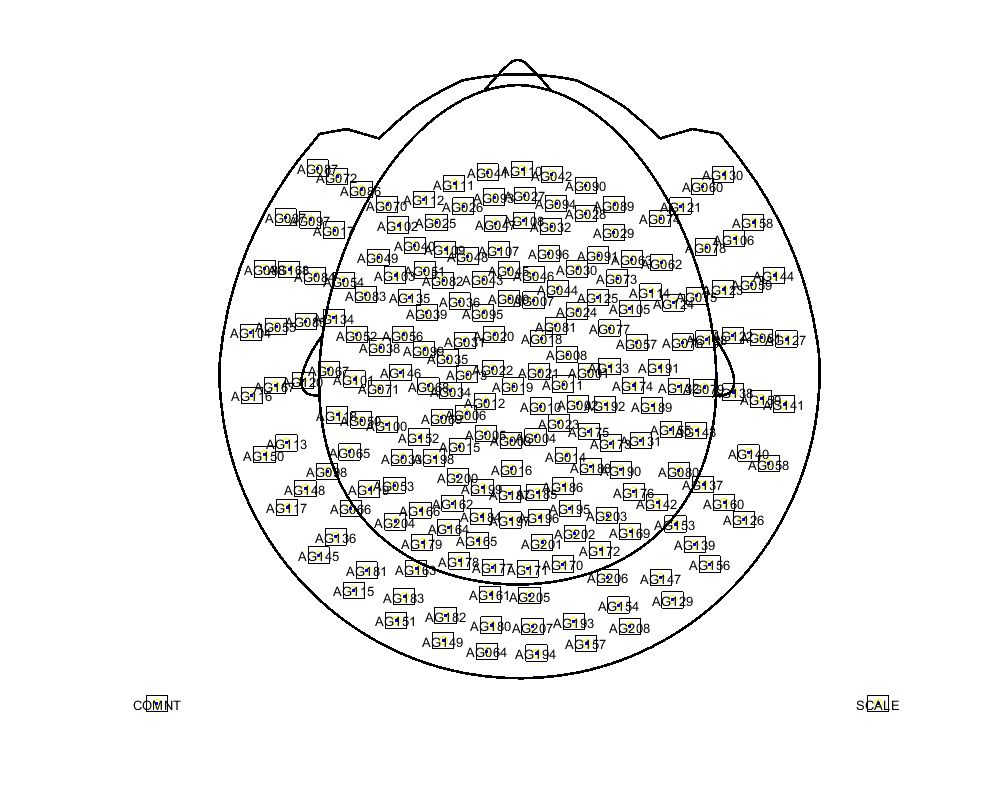

In [15]:
%% Prepare KIT layout

kit_layout = create_kit_layout(ATTEND_LEFT_CON);

figure('Position', [100, 100, 1000, 800]); % Adjust the width and height (1000 and 800) as needed
ft_plot_layout(kit_layout, 'box', 1);

the call to "ft_prepare_layout" took 0 seconds


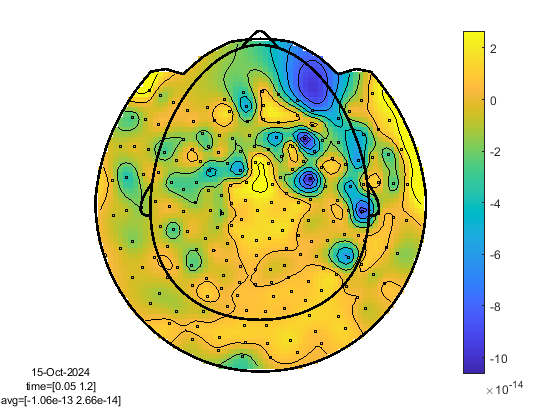

the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotER" took 3 seconds
the call to "ft_prepare_layout" took 0 seconds


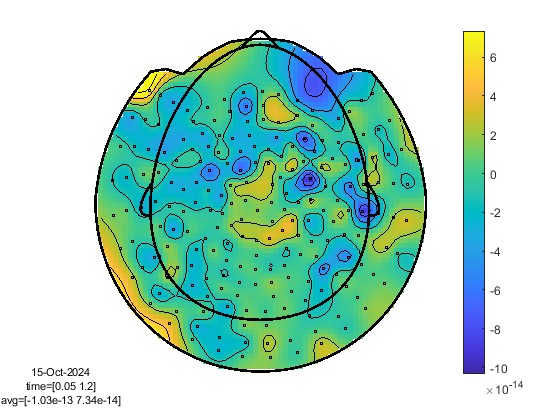

the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotER" took 2 seconds


In [16]:
%% Plotting in space

% for a single trial type, for each channel, average over time the trial
% and plot the average value on the helmet

% You can still see the time behavior when clicking on one sensor

cfg = [];
cfg.xlim = [0.05 1.2];
cfg.colorbar = 'yes';
cfg.layout = kit_layout;
ft_topoplotER(cfg, avgALTL);

cfg = [];
cfg.xlim = [0.05 1.2];
cfg.colorbar = 'yes';
cfg.layout = kit_layout;
ft_topoplotER(cfg, avgARTL);

In [ ]:
Plotting ERP in sensor space for ALTL and ARTL for the `AG147` sensor (right head side), reexecute this cell for the `AG183` sensor (left head side).

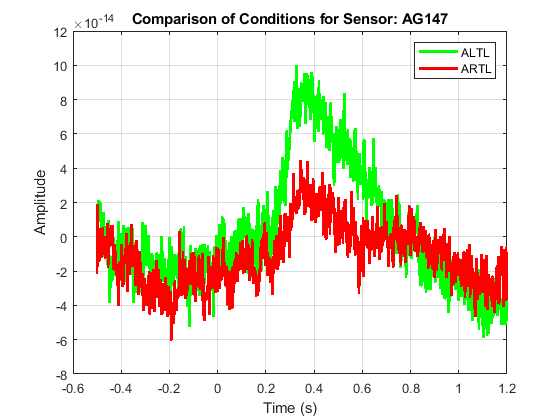

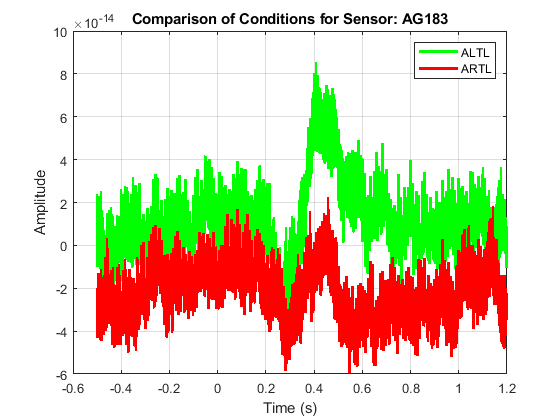

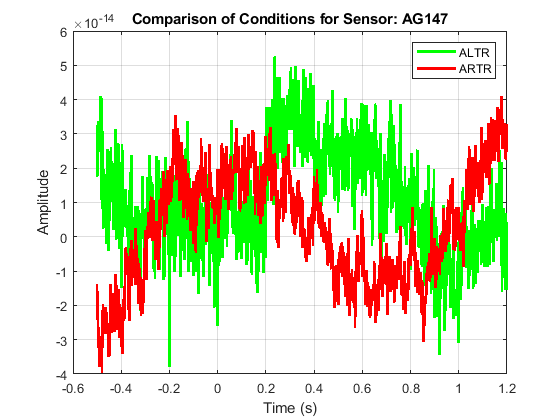

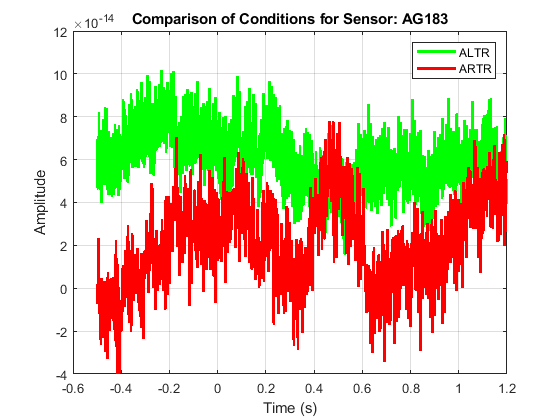

In [26]:
function plotERPComparisonMultipleSensors(sensor_names, condition1, condition2, condition1_name, condition2_name)
    % Function to plot ERP comparison for multiple sensors
    % Inputs:
    %   - sensor_names: a cell array of sensor names (e.g., {'AG183', 'AG147'})
    %   - condition1: structure containing the ERP data for the first condition (e.g., avgALTL)
    %   - condition2: structure containing the ERP data for the second condition (e.g., avgARTL)
    %   - condition1_name: name of the first condition (e.g., 'ALTL')
    %   - condition2_name: name of the second condition (e.g., 'ARTL')

    for i = 1:length(sensor_names)
        sensor_name = sensor_names{i};
        
        % Find the index of the sensor in the layout
        sensor_idx = find(strcmp(condition1.label, sensor_name));
        
        if isempty(sensor_idx)
            warning(['Sensor ' sensor_name ' not found in the data. Skipping...']);
            continue;
        end

        % Extract time and data for the sensor from both conditions
        time = condition1.time; % Assuming both conditions have the same time vector
        data_condition1 = condition1.avg(sensor_idx, :);
        data_condition2 = condition2.avg(sensor_idx, :);

        % Plot both conditions for the same sensor
        figure;
        plot(time, data_condition1, 'g', 'LineWidth', 2); % Plot condition1 in green
        hold on;
        plot(time, data_condition2, 'r', 'LineWidth', 2); % Plot condition2 in red

        % Add labels and legend
        xlabel('Time (s)');
        ylabel('Amplitude');
        legend(condition1_name, condition2_name);
        title(['Comparison of Conditions for Sensor: ' sensor_name]);

        % Add grid for better visualization
        grid on;
    end
end


sensor_names = {'AG147', 'AG183'};  % List of sensors
plotERPComparisonMultipleSensors(sensor_names, avgALTL, avgARTL, 'ALTL', 'ARTL');

sensor_names = {'AG147', 'AG183'};  % List of sensors
plotERPComparisonMultipleSensors(sensor_names, avgALTR, avgARTR, 'ALTR', 'ARTR');

Let us do the same for the ARTR and ALTR and plot the ERP's.

the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the input is timelock data with 1 channels and 1700 timebins


constructing single trial from "avg"
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials


trial 1, frequency 11 (14.12 Hz), 1 tapers
the call to "ft_freqanalysis" took 1 seconds
the input is timelock data with 1 channels and 1700 timebins


constructing single trial from "avg"
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials


trial 1, frequency 11 (14.12 Hz), 1 tapers
the call to "ft_freqanalysis" took 1 seconds


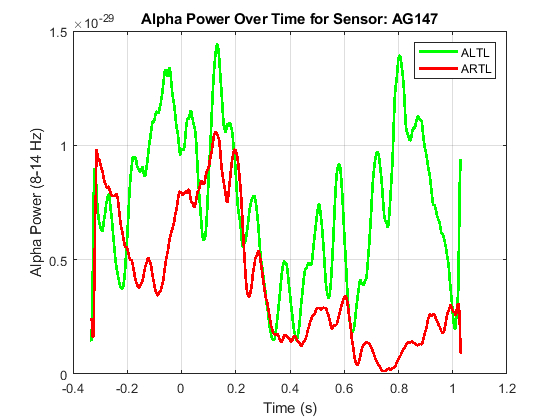

the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the input is timelock data with 1 channels and 1700 timebins


constructing single trial from "avg"
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials


trial 1, frequency 11 (14.12 Hz), 1 tapers
the call to "ft_freqanalysis" took 1 seconds
the input is timelock data with 1 channels and 1700 timebins


constructing single trial from "avg"
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials


trial 1, frequency 11 (14.12 Hz), 1 tapers
the call to "ft_freqanalysis" took 1 seconds


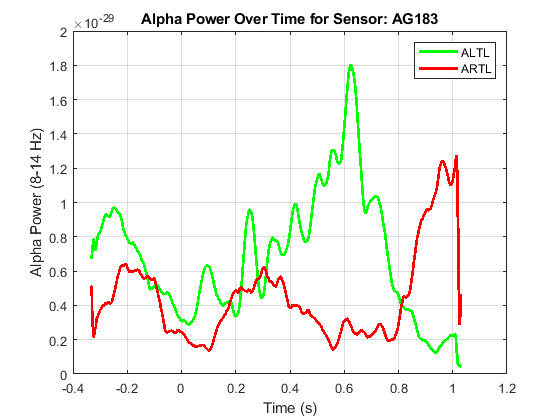

the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the input is timelock data with 1 channels and 1700 timebins


constructing single trial from "avg"
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials


trial 1, frequency 11 (14.12 Hz), 1 tapers
the call to "ft_freqanalysis" took 1 seconds
the input is timelock data with 1 channels and 1700 timebins


constructing single trial from "avg"
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials


trial 1, frequency 11 (14.12 Hz), 1 tapers
the call to "ft_freqanalysis" took 1 seconds


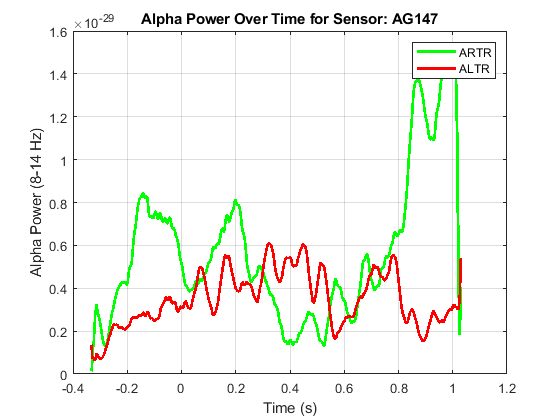

the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the input is timelock data with 1 channels and 1700 timebins


constructing single trial from "avg"
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials


trial 1, frequency 11 (14.12 Hz), 1 tapers
the call to "ft_freqanalysis" took 1 seconds
the input is timelock data with 1 channels and 1700 timebins


constructing single trial from "avg"
the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials


trial 1, frequency 11 (14.12 Hz), 1 tapers
the call to "ft_freqanalysis" took 1 seconds


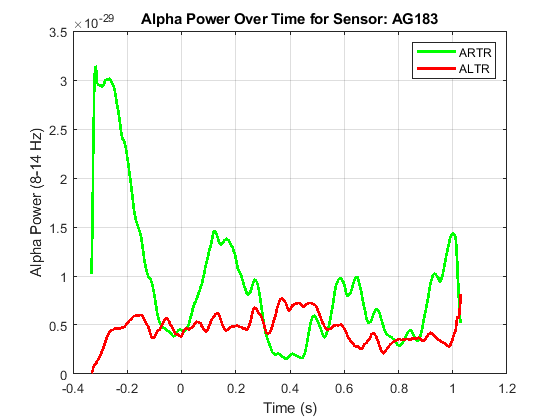

In [23]:
function plotAlphaPowerForTwoConditions(sensor_names, condition1, condition2, condition1_name, condition2_name)
    % Function to plot alpha power (8-14 Hz) for multiple sensors across two conditions
    % Inputs:
    %   - sensor_names: a cell array of sensor names (e.g., {'AG183', 'AG147'})
    %   - condition1: structure containing the data for the first condition (e.g., avgALTL)
    %   - condition2: structure containing the data for the second condition (e.g., avgARTL)
    %   - condition1_name: name of the first condition (e.g., 'ALTL')
    %   - condition2_name: name of the second condition (e.g., 'ARTL')

    for i = 1:length(sensor_names)
        sensor_name = sensor_names{i};
        
        % Find the index of the sensor in the layout
        sensor_idx = find(strcmp(condition1.label, sensor_name));
        
        if isempty(sensor_idx)
            warning(['Sensor ' sensor_name ' not found in the data. Skipping...']);
            continue;
        end

        % Select data for that sensor for both conditions
        cfg = [];
        cfg.channel = {sensor_name};  % Use only the specific sensor
        condition1_sensor = ft_selectdata(cfg, condition1);
        condition2_sensor = ft_selectdata(cfg, condition2);

        % Perform time-frequency analysis for condition1
        cfg = [];
        cfg.method     = 'mtmconvol';    % Time-frequency analysis using multitapers
        cfg.foi        = 8:0.1:14;      % Frequencies of interest (alpha band 8-14 Hz)
        cfg.t_ftimwin  = 3 ./ cfg.foi;   % Time window length
        cfg.tapsmofrq  = 2.5;           % Smoothing in frequency domain
        cfg.toi        = 'all';         % Time of interest (use all time points)
        cfg.output     = 'pow';         % Output power spectrum

        % Perform time-frequency analysis for both conditions
        freq_condition1_sensor = ft_freqanalysis(cfg, condition1_sensor);
        freq_condition2_sensor = ft_freqanalysis(cfg, condition2_sensor);

        % Extract the alpha band power (8-14 Hz) and ignore NaN values
        alpha_band_idx = find(freq_condition1_sensor.freq >= 8 & freq_condition1_sensor.freq <= 14);
        
        if isempty(alpha_band_idx)
            error('Alpha band (8-14 Hz) not found in the frequency range.');
        end

        % Calculate the mean alpha power over time for both conditions, ignoring NaNs
        alpha_power_condition1 = nanmean(freq_condition1_sensor.powspctrm(1, alpha_band_idx, :), 2);
        alpha_power_condition1 = squeeze(alpha_power_condition1);  % Convert to 1D
        
        alpha_power_condition2 = nanmean(freq_condition2_sensor.powspctrm(1, alpha_band_idx, :), 2);
        alpha_power_condition2 = squeeze(alpha_power_condition2);  % Convert to 1D

        % Plot both conditions' alpha power on the same plot
        figure;
        plot(freq_condition1_sensor.time, alpha_power_condition1, 'g', 'LineWidth', 2);  % Condition1 in green
        hold on;
        plot(freq_condition2_sensor.time, alpha_power_condition2, 'r', 'LineWidth', 2);  % Condition2 in red

        % Add labels, legend, and title
        xlabel('Time (s)');
        ylabel('Alpha Power (8-14 Hz)');
        legend(condition1_name, condition2_name);
        title(['Alpha Power Over Time for Sensor: ' sensor_name]);

        % Add grid for better visualization
        grid on;
    end
end

sensor_names = {'AG147', 'AG183'};  % List of sensor names
plotAlphaPowerForTwoConditions(sensor_names, avgALTL, avgARTL, 'ALTL', 'ARTL');

sensor_names = {'AG147', 'AG183'};  % List of sensor names
plotAlphaPowerForTwoConditions(sensor_names, avgARTR, avgALTR, 'ARTR', 'ALTR');